In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from rdkit import RDLogger
from rdkit import Chem
from rdkit.Chem import AllChem, Draw

lg = RDLogger.logger()
lg.setLevel(RDLogger.CRITICAL)


In [2]:
def draw_mols(dfsh, id_col, val_col, nshow=10, smiles_col="smiles"):
    mols = [Chem.MolFromSmiles(m) for m in dfsh[smiles_col].values[:nshow]]
    lgnds = []
    for tid, m, mol in zip(dfsh[id_col].values[:nshow], dfsh[val_col].values[:nshow], mols):
        lgnd = f"{tid} s={float(m):.2f}"
        try:
            lgnd = f"{tid} s={float(m):.2f}, Mw={rdMolDescriptors._CalcMolWt(mol):.1f}"
        except Exception as e:
            pass
        lgnds.append(lgnd)
        
    display(Draw.MolsToGridImage(mols[:nshow],
                         molsPerRow=5, subImgSize=(300,200), 
                         legends=lgnds[:nshow]))

def get_bound(df, prop_name, reduce_fn=max):
    df_props = df
    x = df_props[prop_name].tolist()
    mx = []
    max_val = None
    for i in x:
        if max_val is None:
            max_val = i
        else:
            max_val = reduce_fn(max_val, i)
        mx.append(max_val)
    return mx

def load_result(outdir, homedir):
    return pd.read_csv(f"{homedir}/{outdir}/history/results.csv")

def plot_reward(df, xlim=None, ylim=None):
    max_score = max(df["episode_reward"])
    print(f"max_score: {max_score}")
    plt.figure()
    plt.scatter(df["episode"], df["episode_reward"], label='original', alpha=0.5, s=1)
    plt.plot(df["episode"], df["episode_reward"].ewm(span=100).mean(), label='ewma', color='tab:orange')
    plt.xlabel("episode")
    plt.ylabel("reward")
    if xlim:
        plt.xlim(xlim)
    if ylim:
        plt.ylim(ylim)
    plt.grid()
    return

def plot_reward_multi(outdirs, xlim=None, ylim=None):
    for od in outdirs:
        df = load_result(od, homedir)
        plot_reward(df, xlim=xlim, ylim=ylim)
        plt.title(od)
    return

def plot_prop(df, prop_name, ylim=None, xlim=None):
    columns = df.columns;
    if prop_name not in columns:
        print(f"prop name {prop_name} not in {columns}")
    reduce_fn = max
    max_prop = get_bound(df, prop_name, reduce_fn)
    max_score = max_prop[-1]
    print(f"max_score: {max_score}")
    
    plt.figure()
    plt.scatter(df["episode"], df[prop_name], label='original', alpha=0.5, s=1)
    plt.plot(df["episode"], df[prop_name].ewm(span=100).mean(), label='ewma', color='tab:orange')
    plt.plot(df["episode"], max_prop, color='tab:green')
    plt.xlabel("episode")
    plt.ylabel(prop_name)
    if ylim is None:
        plt.ylim(0, max_score + 1)
    else:
        plt.ylim(ylim)
    if xlim is not None:
        plt.xlim(xlim)
    plt.grid()
    return

def plot_prop_multi(outdirs, prop_name, homedir, ylim=None, xlim=None):
    for od in outdirs:
        df = load_result(od, homedir)
        plot_prop(df, prop_name, ylim=ylim, xlim=xlim)
        plt.title(od)
    return

def draw_mols_score(df, xlim=None, score="episode_reward", ascending=False):
    display(f"Top mol by {score}")
    dfp = df
    if xlim:
        dfp = dfp[(xlim[0]<=df["episode"])&(df["episode"]<xlim[1])]
    draw_mols(dfp.sort_values(score, ascending=ascending), id_col="episode", val_col=score)
    return

def draw_mols_multi(outdirs, homedir, score="episode_reward", xlim=None):
    for od in outdirs:
        df = load_result(od, homedir)
        display(f"Top mol of {od}")
        draw_mols_score(df, xlim=xlim, score=score)
    return


# Celecoxib rediscovery
- C1: step reward/no dup penalty
- C2: final reward/dup penalty
- C3: step reward/dup penalty

max_score: 0.6071428571428571
max_score: 0.8421052631578947
max_score: 1.0


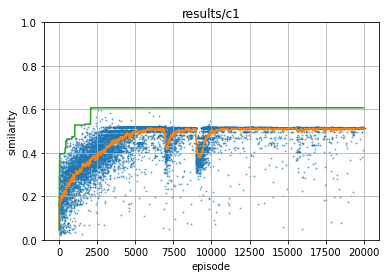

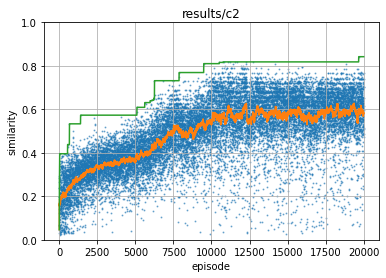

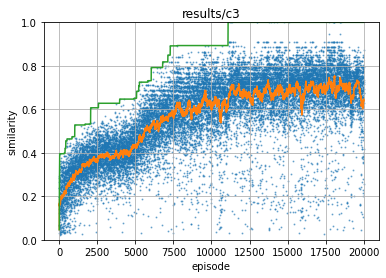

In [3]:
plot_prop_multi([
    "results/c1",
    "results/c2",
    "results/c3",
    ], prop_name="similarity", 
    ylim=(0,1),
    #xlim=(0,5000),
homedir="../../"
);

'Top mol of results/c1'

'Top mol by similarity'

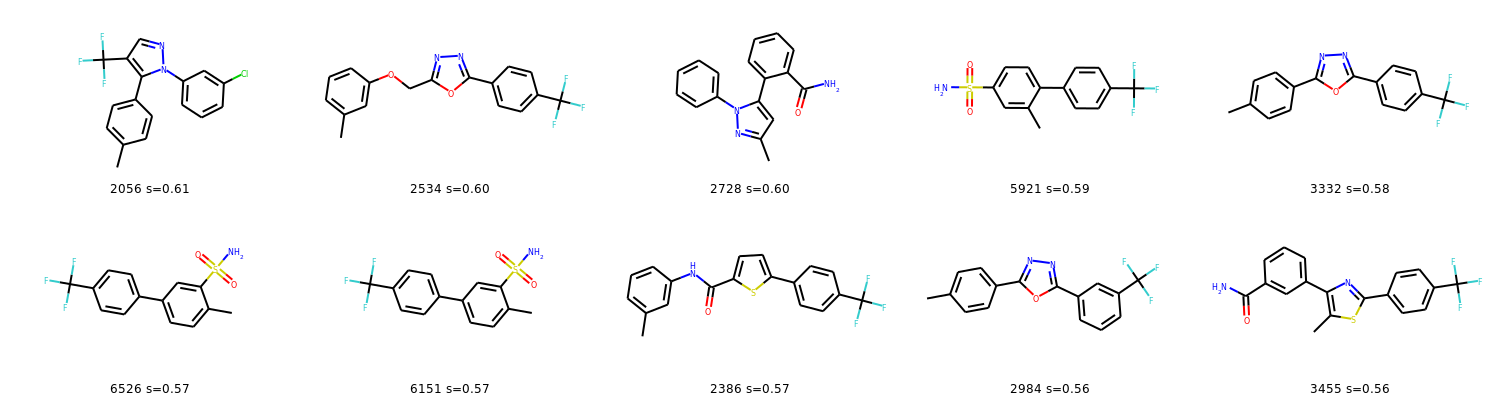

'Top mol of results/c2'

'Top mol by similarity'

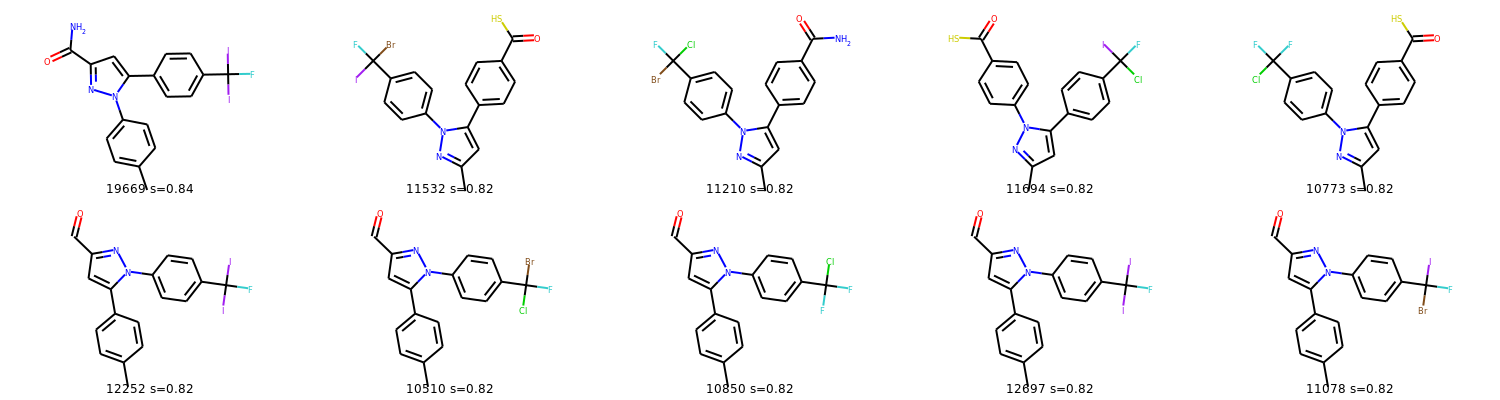

'Top mol of results/c3'

'Top mol by similarity'

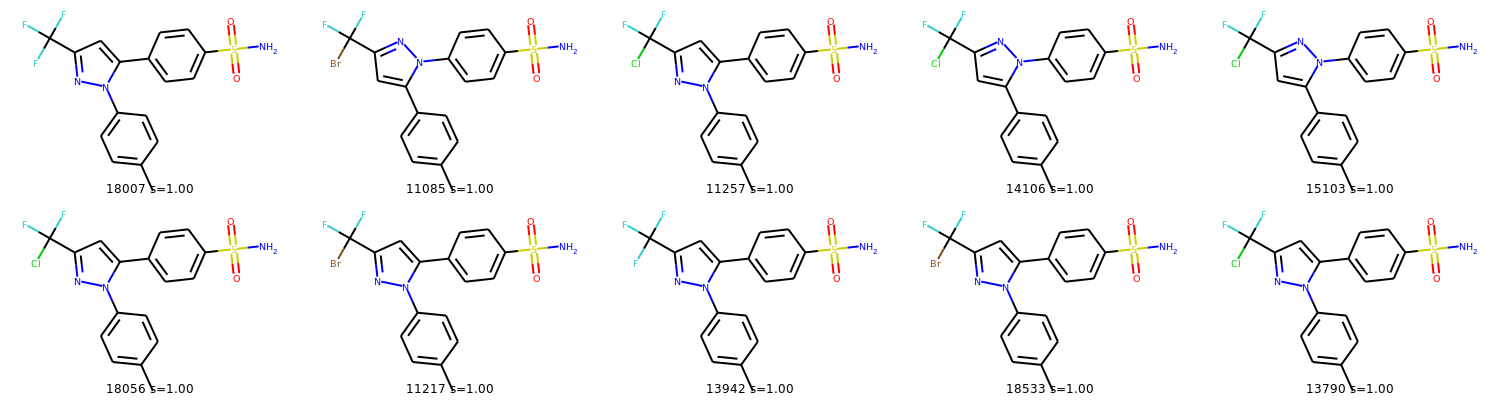

In [4]:
draw_mols_multi([
    "results/c1",
    "results/c2",
    "results/c3",
],
score="similarity",
homedir="../../");

# Vortioxetine rediscovery
- S1: step reward/no dup penalty
- S2: final reward/dup penalty
- S3: step reward/dup penalty

max_score: 0.6301369863013698
max_score: 0.7761194029850746
max_score: 1.0


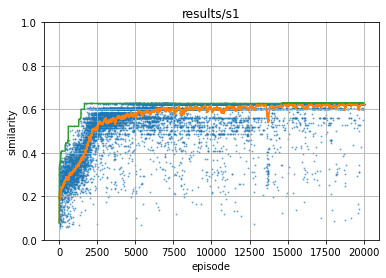

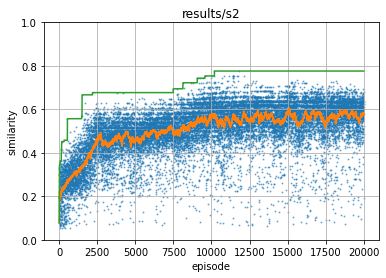

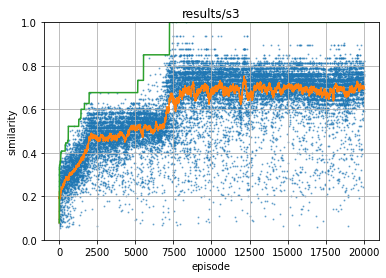

In [5]:
plot_prop_multi([
    "results/s1",
    "results/s2",
    "results/s3",
    ], prop_name="similarity", 
    ylim=(0,1),
    #xlim=(0,5000),
homedir="../../");

'Top mol of results/s1'

'Top mol by similarity'

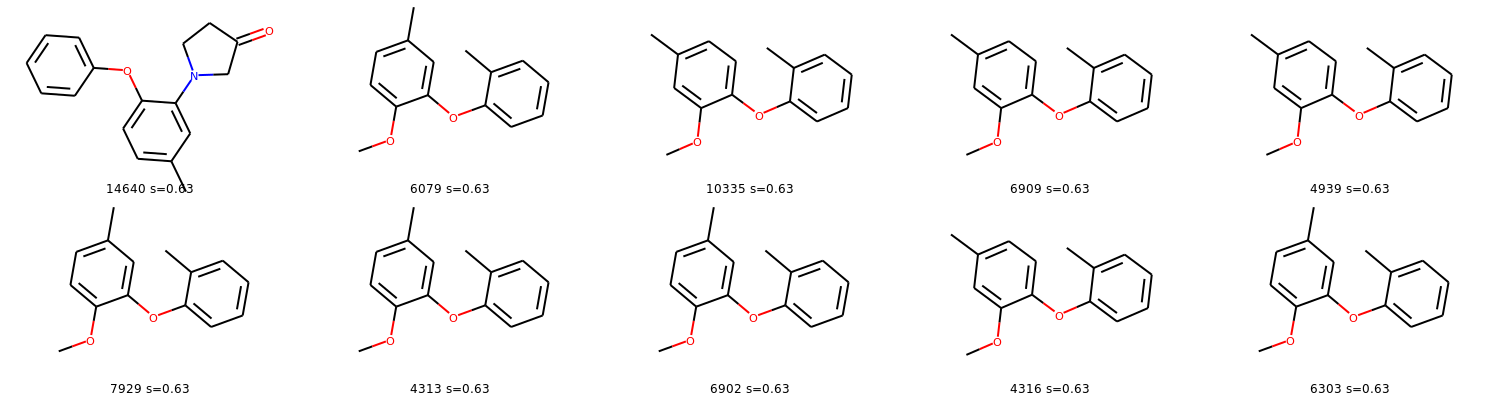

'Top mol of results/s2'

'Top mol by similarity'

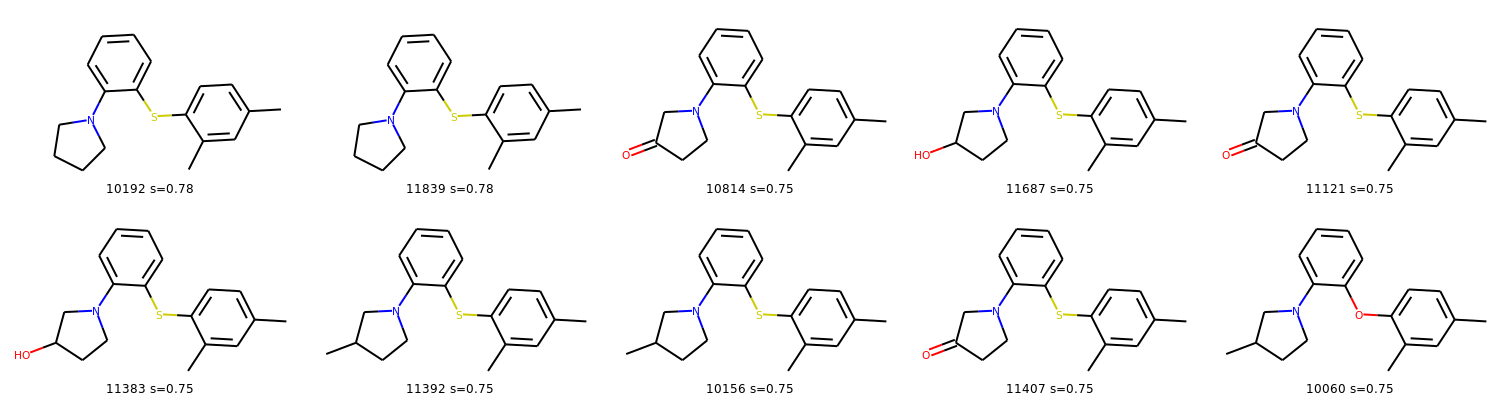

'Top mol of results/s3'

'Top mol by similarity'

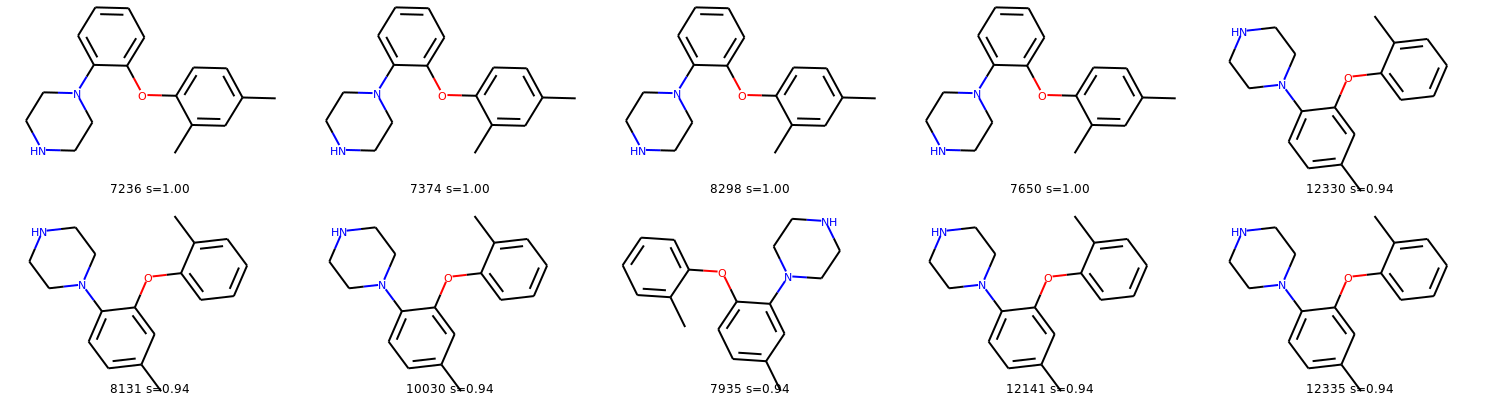

In [6]:
draw_mols_multi([
    "results/s1",
    "results/s2",
    "results/s3",
],
score="similarity",
homedir="../../");